In [1]:
from src.data_sketching_kalman_filter.kalman_filter.full_KF import *
from src.data_sketching_kalman_filter.kalman_filter.RS_KF import *
from src.data_sketching_kalman_filter.kalman_filter.CoutingSketch_KF import *
from src.data_sketching_kalman_filter.kalman_filter.AC_sketching_KF import *

In [2]:
# Number of time slot
N = 50

# Number of observation per time slot
# for the convinence of JL transform >_<
D = 1500

# Number of features
p = 50

# scaler for covariance matrix of noise vector
sigma_w = 0.1
sigma_v = 1

# initial state vector
m0 = np.zeros((p, 1))
m0[0] = 20
m0[4] = -30

# transition matrix
F = state_transition_matrix(p)

# add the initial state with some noise
theta = initial_state(p)

# covariance matrix for white noise of state
Q = noise_cov(p) * sigma_w ** 2

# covariance matrix for white noise of observation
R = noise_cov_idp(D) * sigma_v ** 2

_,  _, theta_set, X_set, y_set = synthetic_data_generate(N, p, Q, R, F, D, theta)


In [3]:
d_per_set = [0.025, 0.05, 0.10, 0.15, 0.2, 0.25]

rs_reuslt_dict = {}
for d_per in d_per_set:
    d = int(d_per * D)
    conclusion_set_rt = []
    conclusion_set_rmse = []
    for mm in range(10):
        running_time = []
        mse_set = []
        P_predict = np.identity(p)
        theta_predict = np.zeros((p, 1))
        for i in range(N):
            kf_begin = time()
            theta_predict, P_predict = rs_kf_mse(y_set[i], X_set[i], Q, R, F, theta_predict, P_predict, d,
                                                 approx_K=False, sketch_size=0.10, iteration_step=4)
            kf_end = time()
            rmse = per_RSME(theta_predict, theta_set[i])
            mse_set.append(rmse ** 2)
            running_time.append(kf_end - kf_begin)

        conclusion_set_rt.append(np.mean(running_time))
        conclusion_set_rmse.append(np.mean(rmse))

    rs_reuslt_dict[d_per] = np.mean(conclusion_set_rmse)
    print('mse is:',  np.mean(conclusion_set_rmse), 'with', 'd/D to be:', d_per)

mse is: 0.8747372293632635 with d/D to be: 0.025
mse is: 0.6352378281851117 with d/D to be: 0.05
mse is: 0.4580251407188284 with d/D to be: 0.1
mse is: 0.39806318097341586 with d/D to be: 0.15
mse is: 0.34454355690986527 with d/D to be: 0.2
mse is: 0.3224893808332731 with d/D to be: 0.25


In [4]:
ck_reuslt_dict = {}
for d_per in d_per_set:
    d = int(d_per * D)
    conclusion_set_rt = []
    conclusion_set_rmse = []
    for mm in range(10):
        running_time = []
        mse_set = []
        P_predict = np.identity(p)
        theta_predict = np.zeros((p, 1))
        for i in range(N):
            kf_begin = time()
            theta_predict, P_predict = count_kf_mse(y_set[i], X_set[i], Q, R, F, theta_predict, P_predict, d,
                                                 approx_K=False, sketch_size=0.10, iteration_step=4)
            kf_end = time()
            rmse = per_RSME(theta_predict, theta_set[i])
            mse_set.append(rmse ** 2)
            running_time.append(kf_end - kf_begin)

        conclusion_set_rt.append(np.mean(running_time))
        conclusion_set_rmse.append(np.mean(rmse))

    ck_reuslt_dict[d_per] = np.mean(conclusion_set_rmse)
    print('mse is:',  np.mean(conclusion_set_rmse), 'with', 'd/D to be:', d_per)

mse is: 0.8108471212468565 with d/D to be: 0.025
mse is: 0.683438134574591 with d/D to be: 0.05
mse is: 0.4625836188873068 with d/D to be: 0.1
mse is: 0.4174633495317406 with d/D to be: 0.15
mse is: 0.3531627848886797 with d/D to be: 0.2
mse is: 0.31868594066017353 with d/D to be: 0.25


In [5]:
ac_tau_set = [3.5, 2.8, 2.5, 2.2, 2, 1.8, 1.5, 1.2]
mu = 0.001
ac_reuslt_dict = {}
for tau in ac_tau_set:

    conclusion_set_rt = []
    conclusion_set_rmse = []
    running_time = []
    for mm in range(10):

        mse_set = []
        len_s_set = []
        P_predict = np.identity(p)
        theta_predict = np.zeros((p, 1))
        for i in range(N):
            kf_begin = time()
            theta_predict, P_predict, len_s = ac_kf_mse(y_set[i], X_set[i], Q, R, F, tau, mu, theta_predict, P_predict,
                                                   approx_K = False, sketch_size = 0.25, iteration_step = 4)
            kf_end = time()
            rmse = per_RSME(theta_predict, theta_set[i])
            mse_set.append(rmse ** 2)
            running_time.append(kf_end - kf_begin)
            len_s_set.append(len_s)

        conclusion_set_rmse.append(np.mean(rmse))

    d_per = np.mean(len_s_set) / D

    ac_reuslt_dict[d_per] = np.mean(conclusion_set_rmse)
    print('mse is:',  np.mean(conclusion_set_rmse), 'with', 'd/D to be:', np.mean(len_s_set)/D, 'and running time to be:', np.mean(running_time))

mse is: 0.6834576083590701 with d/D to be: 0.02742666666666667 and running time to be: 0.015283097267150879
mse is: 0.5147124067675876 with d/D to be: 0.05302666666666667 and running time to be: 0.012692552089691162
mse is: 0.36306049961854914 with d/D to be: 0.07994666666666667 and running time to be: 0.013592277526855469
mse is: 0.3675425260238897 with d/D to be: 0.12185333333333333 and running time to be: 0.014594399452209472
mse is: 0.3178809729934241 with d/D to be: 0.16269333333333333 and running time to be: 0.01713078451156616
mse is: 0.2966585327271948 with d/D to be: 0.20837333333333333 and running time to be: 0.018375469207763673
mse is: 0.26620538917327036 with d/D to be: 0.27183999999999997 and running time to be: 0.03668361616134644
mse is: 0.2589415029393117 with d/D to be: 0.33118666666666663 and running time to be: 0.0339862790107727


In [6]:
kp_reuslt_dict = {}
for d_per in d_per_set:
    conclusion_set_rt = []
    conclusion_set_rmse = []
    for mm in range(2):
        running_time = []
        mse_set = []
        P_predict = np.identity(p)
        theta_predict = np.zeros((p, 1))
        for i in range(N):
            kf_begin = time()
            theta_predict, P_predict = full_kf_mse(y_set[i], X_set[i], Q, R, F, theta_predict, P_predict,
                                                 approx_K=True, sketch_size=d_per, iteration_step=5)
            kf_end = time()
            rmse = per_RSME(theta_predict, theta_set[i])
            mse_set.append(rmse ** 2)
            running_time.append(kf_end - kf_begin)

        conclusion_set_rt.append(np.mean(running_time))
        conclusion_set_rmse.append(np.mean(rmse))

    kp_reuslt_dict[d_per] = np.mean(conclusion_set_rmse)
    print('mse is:',  np.mean(conclusion_set_rmse), 'with', 'd/D to be:', d_per)

mse is: 0.6502851745274539 with d/D to be: 0.025
mse is: 0.20225050306501535 with d/D to be: 0.05
mse is: 0.1976145591594649 with d/D to be: 0.1
mse is: 0.19583963653916908 with d/D to be: 0.15
mse is: 0.20069886912019125 with d/D to be: 0.2
mse is: 0.19450311709296308 with d/D to be: 0.25


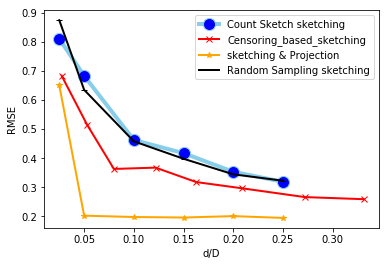

In [12]:
%matplotlib inline
rs_sketching_d = list(rs_reuslt_dict.keys())
rs_sketching_rmse = list(rs_reuslt_dict.values())

ck_sketching_d = list(ck_reuslt_dict.keys())
ck_sketching_rmse = list(ck_reuslt_dict.values())

ac_sketching_d = list(ac_reuslt_dict.keys())
ac_sketching_rmse = list(ac_reuslt_dict.values())

kp_sketching_d = list(kp_reuslt_dict.keys())
kp_sketching_rmse = list(kp_reuslt_dict.values())

import matplotlib.pyplot as plt
plt.plot(ck_sketching_d, ck_sketching_rmse,  marker='o', markerfacecolor='blue', markersize=12, color='skyblue',
         linewidth=4, label = 'Count Sketch sketching')
plt.plot(ac_sketching_d, ac_sketching_rmse, marker='x', color='red', linewidth=2, label = 'Censoring_based_sketching')
plt.plot(kp_sketching_d, kp_sketching_rmse, marker='*', color='orange', linewidth=2, label = 'sketching & Projection')
plt.plot(rs_sketching_d, rs_sketching_rmse, marker='_', color='black', linewidth=2, label = 'Random Sampling sketching')
plt.xlabel('d/D')
plt.ylabel('RMSE')
plt.legend()
plt.show()

In [13]:
running_time = []
mse_set = []
P_predict = np.identity(p)
theta_predict = np.zeros((p, 1))
for i in range(N):
    kf_begin = time()
    theta_predict, P_predict = full_kf_mse(y_set[i], X_set[i], Q, R, F, theta_predict, P_predict,
                                           approx_K=False, sketch_size=d_per, iteration_step=5)
    kf_end = time()
    rmse = per_RSME(theta_predict, theta_set[i])
    mse_set.append(rmse ** 2)
    running_time.append(kf_end - kf_begin)

conclusion_set_rt.append(np.mean(running_time))
conclusion_set_rmse.append(np.mean(rmse))

kp_reuslt_dict[d_per] = np.mean(conclusion_set_rmse)
print('mse is:', np.mean(conclusion_set_rmse), 'with', 'd/D to be:', d_per)


# apply both count sketch and projection & sketch method
import pandas as pd
import seaborn as sns

sketch_size = [0.05, 0.1, 0.15, 0.2, 0.25]
d_D = [0.3, 0.35, 0.40, 0.45, 0.5]

Index = [str(i) for i in sketch_size]
Cols = [str(i) for i in d_D]
df = pd.DataFrame(index = Index, columns = Cols)

for d_per in d_D:
    for s in sketch_size:
        d = int(d_per * D)
        running_time = []
        mse_set = []
        P_predict = np.identity(p)
        theta_predict = np.zeros((p, 1))
        for i in range(N):
            kf_begin = time()
            theta_predict, P_predict = count_kf_mse(y_set[i], X_set[i], Q, R, F, theta_predict, P_predict, d,
                                                 approx_K=True, sketch_size=s, iteration_step=5)
            kf_end = time()
            rmse = per_RSME(theta_predict, theta_set[i])

            running_time.append(kf_end - kf_begin)
            mse_set.append(rmse)
        mean_run_time = np.mean(running_time)
        mean_rmse = np.mean(mse_set)
        df.loc[str(s), str(d_per)] = mean_rmse
        print('average rmse is {} for d_per = {} and sketch size = {}, running time = {}'.format(mean_rmse, d_per, s, mean_run_time))


mse is: 0.19464515365910992 with d/D to be: 0.25
average rmse is 5.4633503847349845 for d_per = 0.3 and sketch size = 0.05, running time = 0.013065032958984375
average rmse is 0.7867415141169362 for d_per = 0.3 and sketch size = 0.1, running time = 0.01805646896362305
average rmse is 0.3357130057143242 for d_per = 0.3 and sketch size = 0.15, running time = 0.03250271797180176
average rmse is 0.32505600130150897 for d_per = 0.3 and sketch size = 0.2, running time = 0.04058987617492676
average rmse is 0.30813468510894926 for d_per = 0.3 and sketch size = 0.25, running time = 0.05536478042602539
average rmse is 2.5131658352557733 for d_per = 0.35 and sketch size = 0.05, running time = 0.02011249542236328
average rmse is 0.3248323678766238 for d_per = 0.35 and sketch size = 0.1, running time = 0.02493819236755371
average rmse is 0.3037319867112068 for d_per = 0.35 and sketch size = 0.15, running time = 0.032367644309997556
average rmse is 0.2957232631603491 for d_per = 0.35 and sketch size

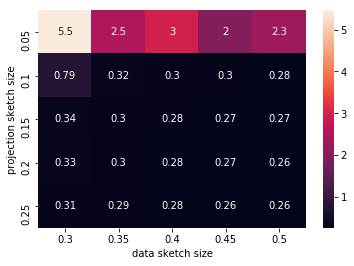

In [17]:
%matplotlib inline
df = df.apply(pd.to_numeric)
sns.heatmap(df, annot=True)
plt.xlabel('data sketch size')
plt.ylabel('projection sketch size')
plt.savefig('skech_sketch.png')
plt.show()